In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from matplotlib.pyplot import imread
import matplotlib.cbook as cbook
from netCDF4 import Dataset

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def ensemble_year(vals, time):

    
    
    ens = np.zeros([366])
    ens7d = np.zeros([367])
    
    
    DOY = time.dayofyear[0:len(vals)] 

    for iday in range(0,366):
        ens[iday] = np.nanmean( vals[DOY == (iday+1)]  ) 
        
    #7-day running mean
    N = 7
    for iday in range(0,367):
        if iday > (366-N):
            ens7d[iday]  = np.nanmean( np.concatenate( (ens[iday:366], ens[0:(N-(366-iday))] )) )

        else:    
            ens7d[iday] = np.nanmean(ens[iday:(iday+N)])
            
            
    return ens7d


In [32]:
#BESS 
#ET supposed to be in mm/day, 
#GPP supposed to be in gC/m2/day,but probably kgC/m2/h
#daily data

bess_ade = np.loadtxt("/home/remko/data/TBM_data/BESS/AdelaideRiver.csv", delimiter=",") 
bess_ade_dates = pd.date_range("01-01-2000", periods = len(bess_ade[:,0]), freq='D')   
bess_ade_pd = pd.DataFrame(bess_ade, index= bess_ade_dates)
#bess_ade_pd = bess_ade_pd.interpolate()

bess_dal = np.loadtxt("/home/remko/data/TBM_data/BESS/DalyUncleared.csv", delimiter=",") 
bess_dal_dates = pd.date_range("01-01-2000", periods = len(bess_dal[:,0]), freq='D') 
bess_dal_pd = pd.DataFrame(bess_dal, index= bess_dal_dates)
#bess_dal_pd = bess_ade_pd.interpolate()

bess_dry = np.loadtxt("/home/remko/data/TBM_data/BESS/DryCreek.csv", delimiter=",") 
bess_dry_dates = pd.date_range("01-01-2000", periods = len(bess_dry[:,0]), freq='D') 
bess_dry_pd = pd.DataFrame(bess_dry, index= bess_dry_dates)
#bess_dry_pd = bess_dry_pd.interpolate()

bess_howard = np.loadtxt("/home/remko/data/TBM_data/BESS/HowardSprings.csv", delimiter=",") 
bess_howard_dates = pd.date_range("01-01-2000", periods = len(bess_howard[:,0]), freq='D') 
bess_howard_pd = pd.DataFrame(bess_dry, index= bess_howard_dates)
#bess_howard_pd = bess_howard_pd.interpolate()

bess_sturt = np.loadtxt("/home/remko/data/TBM_data/BESS/SturtPlains.csv", delimiter=",") 
bess_sturt_dates = pd.date_range("01-01-2000", periods = len(bess_sturt[:,0]), freq='D') 
bess_sturt_pd = pd.DataFrame(bess_sturt, index= bess_sturt_dates)
#bess_sturt_pd = bess_sturt_pd.interpolate()


bess = {
    "HowardSprings":bess_howard_pd,
    "AdelaideRiver": bess_ade_pd, 
    "DalyUncleared": bess_dal_pd,
    "DryRiver": bess_dry_pd,
    "SturtPlains": bess_sturt_pd,
}

bess_dates = {
    "HowardSprings":bess_howard_dates,
    "AdelaideRiver": bess_ade_dates, 
    "DalyUncleared": bess_dal_dates,
    "DryRiver": bess_dry_dates,
    "SturtPlains": bess_sturt_dates,
}

In [4]:
#BIOS2
#ET in ???
#GPP in ???

bios2_ade = np.loadtxt("/home/remko/data/TBM_data/BIOS2/AdelaideRiver_ET_GPP.csv", delimiter=",") 
bios2_ade_dates = pd.date_range(datetime(int(bios2_ade[0,0]),int(bios2_ade[0,1]),int(bios2_ade[0,2])), 
              datetime(int(bios2_ade[-1,0]),int(bios2_ade[-1,1]),int(bios2_ade[-1,2])),freq='D')
bios2_dal = np.loadtxt("/home/remko/data/TBM_data/BIOS2/DalyRiverUncleared_ET_GPP.csv", delimiter=",") 
bios2_dal_dates = pd.date_range(datetime(int(bios2_dal[0,0]),int(bios2_dal[0,1]),int(bios2_dal[0,2])), 
              datetime(int(bios2_ade[-1,0]),int(bios2_ade[-1,1]),int(bios2_ade[-1,2])),freq='D')
bios2_dry = np.loadtxt("/home/remko/data/TBM_data/BIOS2/DryCreek_ET_GPP.csv", delimiter=",") 
bios2_dry_dates = pd.date_range(datetime(int(bios2_dry[0,0]),int(bios2_dry[0,1]),int(bios2_dry[0,2])), 
              datetime(int(bios2_ade[-1,0]),int(bios2_ade[-1,1]),int(bios2_ade[-1,2])),freq='D')
bios2_howard = np.loadtxt("/home/remko/data/TBM_data/BIOS2/HowardSprings_ET_GPP.csv", delimiter=",") 
bios2_howard_dates = pd.date_range(datetime(int(bios2_howard[0,0]),int(bios2_howard[0,1]),int(bios2_howard[0,2])), 
              datetime(int(bios2_howard[-1,0]),int(bios2_howard[-1,1]),int(bios2_howard[-1,2])),freq='D')
bios2_sturt = np.loadtxt("/home/remko/data/TBM_data/BIOS2/SturtPlains_ET_GPP.csv", delimiter=",") 
bios2_sturt_dates = pd.date_range(datetime(int(bios2_sturt[0,0]),int(bios2_sturt[0,1]),int(bios2_sturt[0,2])), 
              datetime(int(bios2_sturt[-1,0]),int(bios2_sturt[-1,1]),int(bios2_sturt[-1,2])),freq='D')

bios2 = {
    "HowardSprings":bios2_howard,
    "AdelaideRiver": bios2_ade, 
    "DalyUncleared": bios2_dal,
    "DryRiver": bios2_dry,
    "SturtPlains": bios2_sturt,
}

bios2_dates = {
    "HowardSprings":bios2_howard_dates,
    "AdelaideRiver": bios2_ade_dates, 
    "DalyUncleared": bios2_dal_dates,
    "DryRiver": bios2_dry_dates,
    "SturtPlains": bios2_sturt_dates,
}

In [5]:
#LPJ-GUESS
#ET in W/m2
#GPP in umol/m2/s

lpj_ade_et = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/adelaide_river/adelaide_river_et_eco.txt", skiprows=1, usecols=3)
lpj_ade_gpp = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/adelaide_river/adelaide_river_gpp_eco.txt", skiprows=1, usecols=3)
lpj_ade_dates = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/adelaide_river/adelaide_river_gpp_eco.txt", skiprows=1)
lpj_ade_dates = pd.date_range(datetime(int(lpj_ade_dates[0,0]),int(lpj_ade_dates[0,1]),int(lpj_ade_dates[0,2])), 
              datetime(int(lpj_ade_dates[-1,0]),int(lpj_ade_dates[-1,1]),int(lpj_ade_dates[-1,2])),freq='D')

lpj_dal_et = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/daly_river_uncleared/daly_river_uncleared_et_eco.txt", skiprows=1, usecols=3)
lpj_dal_gpp = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/daly_river_uncleared/daly_river_uncleared_gpp_eco.txt", skiprows=1, usecols=3)
lpj_dal_dates = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/daly_river_uncleared/daly_river_uncleared_gpp_eco.txt", skiprows=1)
lpj_dal_dates = pd.date_range(datetime(int(lpj_dal_dates[0,0]),int(lpj_dal_dates[0,1]),int(lpj_dal_dates[0,2])), 
              datetime(int(lpj_dal_dates[-1,0]),int(lpj_dal_dates[-1,1]),int(lpj_dal_dates[-1,2])),freq='D')

lpj_dry_et = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/dry_river/dry_river_et_eco.txt", skiprows=1, usecols=3)
lpj_dry_gpp = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/dry_river/dry_river_gpp_eco.txt", skiprows=1, usecols=3)
lpj_dry_dates = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/dry_river/dry_river_gpp_eco.txt", skiprows=1)
lpj_dry_dates = pd.date_range(datetime(int(lpj_dry_dates[0,0]),int(lpj_dry_dates[0,1]),int(lpj_dry_dates[0,2])), 
              datetime(int(lpj_dry_dates[-1,0]),int(lpj_dry_dates[-1,1]),int(lpj_dry_dates[-1,2])),freq='D')

lpj_howard_et = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/howard_springs/howard_springs_et_eco.txt", skiprows=1, usecols=3)
lpj_howard_gpp = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/howard_springs/howard_springs_gpp_eco.txt", skiprows=1, usecols=3)
lpj_howard_dates = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/howard_springs/howard_springs_gpp_eco.txt", skiprows=1)
lpj_howard_dates = pd.date_range(datetime(int(lpj_howard_dates[0,0]),int(lpj_howard_dates[0,1]),int(lpj_howard_dates[0,2])), 
              datetime(int(lpj_howard_dates[-1,0]),int(lpj_howard_dates[-1,1]),int(lpj_howard_dates[-1,2])),freq='D')

lpj_sturt_et = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/sturt_plains/sturt_plains_et_eco.txt", skiprows=1, usecols=3)
lpj_sturt_gpp = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/sturt_plains/sturt_plains_gpp_eco.txt", skiprows=1, usecols=3)
lpj_sturt_dates = np.loadtxt("/home/remko/data/TBM_data/LPJGUESS/sturt_plains/sturt_plains_gpp_eco.txt", skiprows=1)
lpj_sturt_dates = pd.date_range(datetime(int(lpj_sturt_dates[0,0]),int(lpj_sturt_dates[0,1]),int(lpj_sturt_dates[0,2])), 
              datetime(int(lpj_sturt_dates[-1,0]),int(lpj_sturt_dates[-1,1]),int(lpj_sturt_dates[-1,2])),freq='D')


lpj = {
    "HowardSprings":[lpj_howard_et, lpj_howard_gpp],
    "AdelaideRiver": [lpj_ade_et, lpj_ade_gpp ],
    "DalyUncleared": [lpj_dal_et, lpj_dal_gpp],
    "DryRiver": [lpj_dry_et, lpj_dry_gpp],
    "SturtPlains": [lpj_sturt_et, lpj_sturt_gpp ],
}

lpj_dates = {
    "HowardSprings":lpj_howard_dates,
    "AdelaideRiver": lpj_ade_dates, 
    "DalyUncleared": lpj_dal_dates,
    "DryRiver": lpj_dry_dates,
    "SturtPlains": lpj_sturt_dates,
}

In [6]:
#MAESPA
#ET in W m-2
#GPP in umol m-2 s-1

maespa_ade = np.loadtxt("/home/remko/data/TBM_data/MAESPA/AdelaideRiver_savannas_maespa_simulation.csv", delimiter=",", skiprows=3, usecols=(3,6))
maespa_ade[maespa_ade == -9999.9] = np.nan
maespa_ade[maespa_ade == -999] = np.nan
maespa_ade_dates = np.loadtxt("/home/remko/data/TBM_data/MAESPA/AdelaideRiver_savannas_maespa_simulation.csv", delimiter=",", dtype=np.str, skiprows=3, usecols=0)
maespa_ade_dates = pd.date_range(maespa_ade_dates[0], maespa_ade_dates[-1],freq='30min')

maespa_dal = np.loadtxt("/home/remko/data/TBM_data/MAESPA/DalyUncleared_savannas_maespa_simulation.csv", delimiter=",", skiprows=3, usecols=(3,6))
maespa_dal_dates = np.loadtxt("/home/remko/data/TBM_data/MAESPA/DalyUncleared_savannas_maespa_simulation.csv", delimiter=",", dtype=np.str, skiprows=3, usecols=0)
maespa_dal[maespa_dal == -9999.9] = np.nan
maespa_dal[maespa_dal == -999] = np.nan
maespa_dal_dates = pd.date_range(maespa_dal_dates[0], maespa_dal_dates[-1],freq='30min')

maespa_dry = np.loadtxt("/home/remko/data/TBM_data/MAESPA/DryRiver_savannas_maespa_simulation.csv", delimiter=",", skiprows=3, usecols=(3,6))
maespa_dry[maespa_dry == -9999.9] = np.nan
maespa_dry[maespa_dry == -999] = np.nan
maespa_dry_dates = np.loadtxt("/home/remko/data/TBM_data/MAESPA/DryRiver_savannas_maespa_simulation.csv", delimiter=",", dtype=np.str, skiprows=3, usecols=0)
maespa_dry_dates = pd.date_range(maespa_dry_dates[0], maespa_dry_dates[-1],freq='30min')

maespa_howard = np.loadtxt("/home/remko/data/TBM_data/MAESPA/HowardSprings_savannas_maespa_simulation.csv", delimiter=",", skiprows=3, usecols=(3,6))
maespa_howard[maespa_howard == -9999.9] = np.nan
maespa_howard[maespa_howard == -999] = np.nan
maespa_howard[maespa_howard == -1388055] = np.nan
maespa_howard_dates = np.loadtxt("/home/remko/data/TBM_data/MAESPA/HowardSprings_savannas_maespa_simulation.csv", delimiter=",", dtype=np.str, skiprows=3, usecols=0)
maespa_howard_dates = pd.date_range(maespa_howard_dates[0], maespa_howard_dates[-1],freq='30min')

maespa_sturt = np.loadtxt("/home/remko/data/TBM_data/MAESPA/SturtPlains_savannas_maespa_simulation.csv", delimiter=",", skiprows=3, usecols=(3,6))
maespa_sturt[maespa_sturt == -9999.9] = np.nan
maespa_sturt[maespa_sturt == -999] = np.nan
maespa_sturt_dates = np.loadtxt("/home/remko/data/TBM_data/MAESPA/SturtPlains_savannas_maespa_simulation.csv", delimiter=",", dtype=np.str, skiprows=3, usecols=0)
maespa_sturt_dates = pd.date_range(maespa_sturt_dates[0], maespa_sturt_dates[-1],freq='30min')

maespa = {
    "HowardSprings": maespa_howard,
    "AdelaideRiver": maespa_ade,
    "DalyUncleared": maespa_dal,
    "DryRiver": maespa_dry,
    "SturtPlains": maespa_sturt,
}

maespa_dates = {
    "HowardSprings":maespa_howard_dates,
    "AdelaideRiver": maespa_ade_dates, 
    "DalyUncleared": maespa_dal_dates,
    "DryRiver": maespa_dry_dates,
    "SturtPlains": maespa_sturt_dates,
}


In [7]:
#SPA
#ET in W/m2
#GPP in mmol m-2 s-1

spa_ade = np.loadtxt("/home/remko/data/TBM_data/SPAv1/adelaideriver_hourly_outputs.csv", delimiter=",", skiprows=1, usecols=(1,3))
spa_ade_dates = np.loadtxt("/home/remko/data/TBM_data/SPAv1/adelaideriver_hourly_outputs.csv", delimiter=",", dtype=np.str, skiprows=1, usecols=0)
spa_ade_dates = pd.date_range(spa_ade_dates[0], spa_ade_dates[-1],freq='30min')

spa_dal = np.loadtxt("/home/remko/data/TBM_data/SPAv1/dalyuncleared_hourly_outputs.csv", delimiter=",", skiprows=1, usecols=(1,3))
spa_dal_dates = np.loadtxt("/home/remko/data/TBM_data/SPAv1/dalyuncleared_hourly_outputs.csv", delimiter=",", dtype=np.str, skiprows=1, usecols=0)
spa_dal_dates = pd.date_range(spa_dal_dates[0], spa_dal_dates[-1],freq='30min')

spa_dry = np.loadtxt("/home/remko/data/TBM_data/SPAv1/dryriver_hourly_outputs.csv", delimiter=",", skiprows=1, usecols=(1,3))
spa_dry_dates = np.loadtxt("/home/remko/data/TBM_data/SPAv1/dryriver_hourly_outputs.csv", delimiter=",", dtype=np.str, skiprows=1, usecols=0)
spa_dry_dates = pd.date_range(spa_dry_dates[0], spa_dry_dates[-1],freq='30min')

spa_howard = np.loadtxt("/home/remko/data/TBM_data/SPAv1/howardsprings_hourly_outputs.csv", delimiter=",", skiprows=1, usecols=(1,3))
spa_howard_dates = np.loadtxt("/home/remko/data/TBM_data/SPAv1/howardsprings_hourly_outputs.csv", delimiter=",", dtype=np.str, skiprows=1, usecols=0)
spa_howard_dates = pd.date_range(spa_howard_dates[0], spa_howard_dates[-1],freq='30min')

spa_sturt = np.loadtxt("/home/remko/data/TBM_data/SPAv1/sturtplains_hourly_outputs.csv", delimiter=",", skiprows=1, usecols=(1,3))
spa_sturt_dates = np.loadtxt("/home/remko/data/TBM_data/SPAv1/sturtplains_hourly_outputs.csv", delimiter=",", dtype=np.str, skiprows=1, usecols=0)
spa_sturt_dates = pd.date_range(spa_sturt_dates[0], spa_sturt_dates[-1],freq='30min')

spa = {
    "HowardSprings": spa_howard,
    "AdelaideRiver": spa_ade,
    "DalyUncleared": spa_dal,
    "DryRiver": spa_dry,
    "SturtPlains": spa_sturt,
}

spa_dates = {
    "HowardSprings":spa_howard_dates,
    "AdelaideRiver": spa_ade_dates, 
    "DalyUncleared": spa_dal_dates,
    "DryRiver": spa_dry_dates,
    "SturtPlains": spa_sturt_dates,
}


In [8]:
#CABLE, 30 min data
#ET in kg/m^2/s
#GPP in umol/m^2/s

ncfile = Dataset("/home/remko/data/TBM_data/CABLE/AdelaideRiver_CABLE.nc")

cable_ade_gpp = np.squeeze(ncfile.variables["GPP"]) # extract variable
cable_ade_et = np.squeeze(ncfile.variables["Evap"]) # extract variable
cable_ade_time = np.squeeze(ncfile.variables['time']) # extract variable
cable_ade_dates = [pd.to_datetime("2007-01-01 00:01:00") + pd.Timedelta(seconds=i) for i in cable_ade_time]
cable_ade_dates = pd.date_range(cable_ade_dates[0], cable_ade_dates[-1],freq='30min')

ncfile = Dataset("/home/remko/data/TBM_data/CABLE/DalyUncleared_CABLE.nc")

cable_dal_gpp = np.squeeze(ncfile.variables["GPP"]) # extract variable
cable_dal_et = np.squeeze(ncfile.variables["Evap"]) # extract variable
cable_dal_time = np.squeeze(ncfile.variables['time']) # extract variable
cable_dal_dates = [pd.to_datetime("2007-01-01 00:01:00") + pd.Timedelta(seconds=i) for i in cable_dal_time]
cable_dal_dates = pd.date_range(cable_dal_dates[0], cable_dal_dates[-1],freq='30min')


ncfile = Dataset("/home/remko/data/TBM_data/CABLE/DryRiver_CABLE.nc")

cable_dry_gpp = np.squeeze(ncfile.variables["GPP"]) # extract variable
cable_dry_et = np.squeeze(ncfile.variables["Evap"]) # extract variable
cable_dry_time = np.squeeze(ncfile.variables['time']) # extract variable
cable_dry_dates = [pd.to_datetime("2007-01-01 00:01:00") + pd.Timedelta(seconds=i) for i in cable_dry_time]
cable_dry_dates = pd.date_range(cable_dry_dates[0], cable_dry_dates[-1],freq='30min')


ncfile = Dataset("/home/remko/data/TBM_data/CABLE/HowardSprings_CABLE.nc")

cable_howard_gpp = np.squeeze(ncfile.variables["GPP"]) # extract variable
cable_howard_et = np.squeeze(ncfile.variables["Evap"]) # extract variable
cable_howard_time = np.squeeze(ncfile.variables['time']) # extract variable
cable_howard_dates = [pd.to_datetime("2007-01-01 00:01:00") + pd.Timedelta(seconds=i) for i in cable_howard_time]
cable_howard_dates = pd.date_range(cable_howard_dates[0], cable_howard_dates[-1],freq='30min')


ncfile = Dataset("/home/remko/data/TBM_data/CABLE/SturtPlains_CABLE.nc")

cable_sturt_gpp = np.squeeze(ncfile.variables["GPP"]) # extract variable
cable_sturt_et = np.squeeze(ncfile.variables["Evap"]) # extract variable
cable_sturt_time = np.squeeze(ncfile.variables['time']) # extract variable
cable_sturt_dates = [pd.to_datetime("2007-01-01 00:01:00") + pd.Timedelta(seconds=i) for i in cable_sturt_time]
cable_sturt_dates = pd.date_range(cable_sturt_dates[0], cable_sturt_dates[-1],freq='30min')


cable = {
    "HowardSprings": [cable_howard_et, cable_howard_gpp],
    "AdelaideRiver": [cable_ade_et, cable_ade_gpp],
    "DalyUncleared": [cable_dal_et, cable_dal_gpp],
    "DryRiver": [cable_dry_et, cable_dry_gpp],
    "SturtPlains": [cable_sturt_et, cable_sturt_gpp],
}

cable_dates = {
    "HowardSprings":cable_howard_dates,
    "AdelaideRiver": cable_ade_dates, 
    "DalyUncleared": cable_dal_dates,
    "DryRiver": cable_dry_dates,
    "SturtPlains": cable_sturt_dates,
}


Litchfield
Litchfield
GPP Litchfield


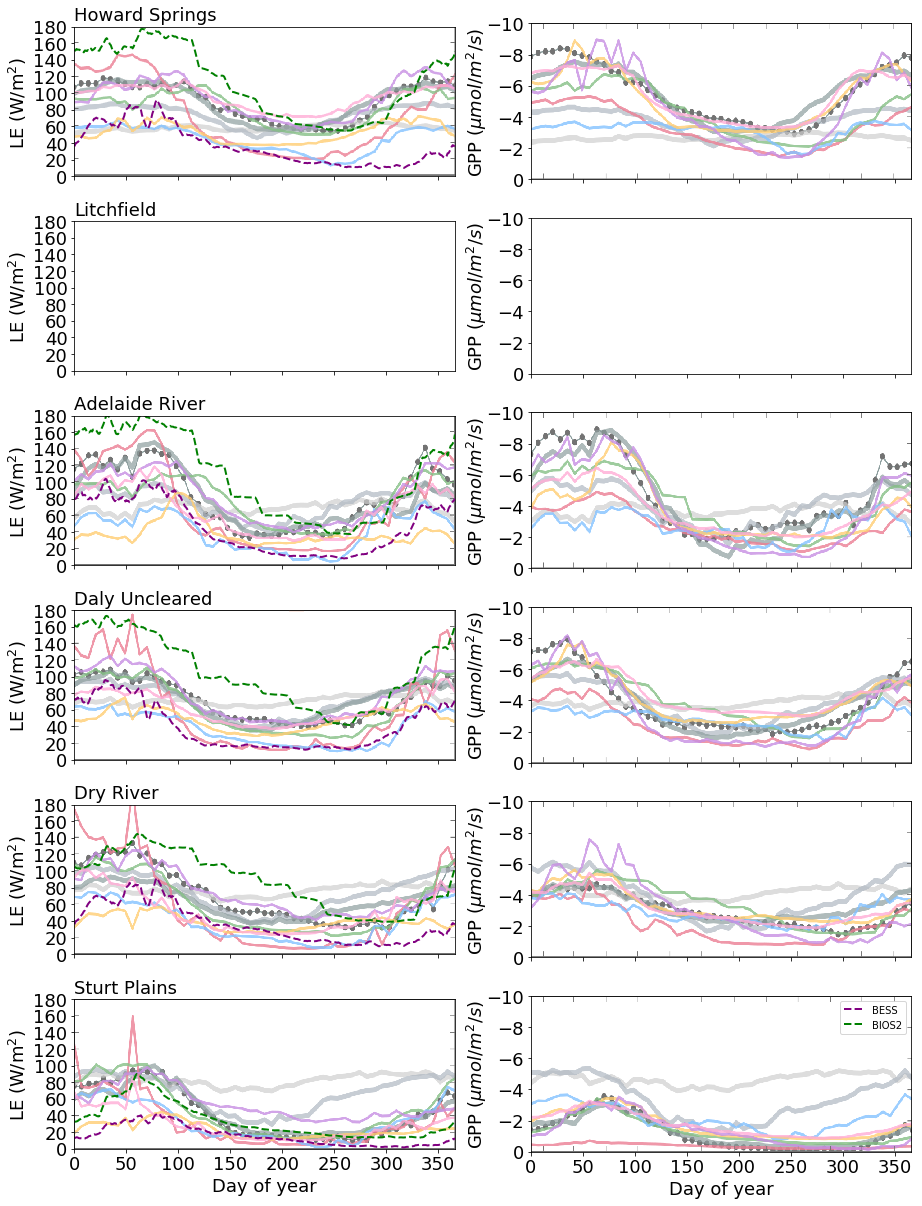

In [39]:
#ensemble year

site = ["HowardSprings","Litchfield", "AdelaideRiver", "DalyUncleared", "DryRiver",  "SturtPlains"]
site_name = ["Howard Springs","Litchfield", "Adelaide River", "Daly Uncleared", "Dry River",  "Sturt Plains"]
site_short = ["howard","litch","adelaide", "daly",  "dry",  "sturt"]

#year to plot per catchment
yearstart = [2006, 2008, 2015, 2004, 2010]
yearend = [2008, 2010, 2017, 2006, 2012] 

const = 2.16679         #[g*K/J]
#lat_heat_vapor = 2.45   #[MJ/kg]
lat_heat_vapor = 2.26   #[MJ/kg]

rho_w = 997             #[kg/m3]
CO2MW = 44.01           #[g/mol]
CMW = 12.0107           #[g/mol]
R = 8.314               #[J/mol/K]
atm_press = 1023.25     #[hPa]
std_tmp = 25.0          #[oC]
temp_conv = 273.15      #[K]


colors = ['red','red','red','red','green', 'orange' ]
iplot = 0

fig, axes   = plt.subplots(nrows=6, ncols=2, figsize=(15, 23), sharex=True,gridspec_kw = {'wspace':0.2, 'hspace':-0.3} )
ax = axes.flat


#loop over study sites
for isite in  np.array([0, 1, 2, 3, 4, 5 ]):  

    #load fluxtower observations
    ea_tmp = np.loadtxt("../../data/DINGO/Ea_"+ site_short[isite] +".txt", usecols=2) #mm/d
    tobs =  np.genfromtxt("../../data/DINGO/Ea_"+ site_short[isite] +".txt",usecols=0, dtype=np.str )#mm/d
    tobs= pd.date_range(tobs[0], tobs[-1], freq='D')   
         
    #convert to latent energy and determine ensemble year
    le_tmp = ea_tmp *  lat_heat_vapor * rho_w * 1000/(3600*24) 
    leo7d = ensemble_year(le_tmp, tobs)
   
    #load model results
    inputfile = "../../data/VOM_output/" + site[isite] + "/freedrainage_cpcff1.0/sce_best/results_daily.txt"
    best_data = np.genfromtxt(inputfile, names=True)

    tmod = pd.date_range(datetime(int(best_data["fyear"][3]),int(best_data["fmonth"][0]),int(best_data["fday"][0])), 
              datetime(int(best_data["fyear"][-1]),int(best_data["fmonth"][-1]),int(best_data["fday"][-1])), 
              freq='D')
    
    #calculate total evaporation and convert to latent energy
    best_e = best_data["esoil"] + best_data["etmt"] + best_data["etmg"]
    le_mod= best_e[-3650:]* lat_heat_vapor * rho_w * 1000 * 1000/(3600*24)
    
    le7d = ensemble_year(le_mod, tmod[-3650:])

    #ensemble years from Whitley
    try:
        bess_et =  bess[site[isite]][1] #mm/day ---> or kJ/s/m2 kW/m2 ??
        #bess_le = bess_et * lat_heat_vapor * rho_w * 1000  /(60 * 60 * 24)   #to W/m2, what is should be
        #bess_le = bess_et *  1000 / 60    #to W/m2 that gives the best fit    
        bess_le = (bess_et * (10**6)) / (60*60*24)  #from MJ/m2/d to W/m2  (based on email Rhys)     
        bess_le7d = ensemble_year(bess_le, bess_dates[site[isite]]) #mm/day --> kJ/min/m2 ??

        bios2_et = bios2[site[isite]][:,4] #mm/day ??
        #bios2_le = bios2_et * lat_heat_vapor * rho_w * 1000  /(60* 60* 24) #W/m2 ???
        bios2_le = bios2_et * 1000  / 60 #W/m2 that gives the best fit???
        bios2_le = bios2_et * lat_heat_vapor * rho_w * 1000  /(60* 60* 24) #from mm/d to W/m2, based on mail Rhys
        bios2_le7d = ensemble_year(bios2_le, bios2_dates[site[isite]]) 

        lpj_le7d = ensemble_year(lpj[site[isite]][0], lpj_dates[site[isite]]) # W/m2

        spa_le7d = ensemble_year(spa[site[isite]][:,1], spa_dates[site[isite]]) # W/m2

        cable_tmp = cable[site[isite]][0] #kg/m^2/s
        cable_le = cable_tmp * lat_heat_vapor * 1000 * 1000  # W/m2
        cable_le7d = ensemble_year(cable_le, cable_dates[site[isite]]) 
        
        maespa_le7d = ensemble_year(maespa[site[isite]][:,1], maespa_dates[site[isite]]) #ET in W m-2

        ax[iplot].plot(range(0,367), bess_le7d, '--' , color="purple", linewidth=2, label = "BESS" )
        ax[iplot].plot(range(0,367), bios2_le7d, '--' , color="green", linewidth=2, label = "BIOS2" )
        #ax[iplot].plot(range(0,367), lpj_le7d, '--' , color="lightblue", linewidth=2, label = "LPJ-GUESS" )
        #ax[iplot].plot(range(0,367), spa_le7d, '--' , color="pink", linewidth=2, label = "SPA" )
        #ax[iplot].plot(range(0,367), cable_le7d, '--' , color="red", linewidth=2, label = "CABLE" )       
        #ax[iplot].plot(range(0,367), maespa_le7d, '--' , color="gold", linewidth=2, label = "MAESPA" )

        
    except KeyError:
        print("Litchfield")
        
        
    
    #load the AoB2015-data for HowardSprings
    if(site[isite] == "HowardSprings"):
        inputfile = "../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt"
        data2015 = np.genfromtxt(inputfile, names=True)

        tmod2015 = pd.date_range(datetime(int(data2015["year"][3]),int(data2015["month"][0]),int(data2015["day"][0])), 
              datetime(int(data2015["year"][-1]),int(data2015["month"][-1]),int(data2015["day"][-1])), 
              freq='D')
    
        #calculate total evaporation and convert to latent energy
        best_e2015 = data2015["esoil"] + data2015["etm_t"] + data2015["etm_g"]
        le_mod2015= best_e2015[-3650:]* lat_heat_vapor * rho_w * 1000 * 1000/(3600*24)
    
        #determine ensemble year
        le7d2015 = ensemble_year(le_mod2015, tmod2015[-3650:])
        
        #start plotting
        #ax[iplot].plot(range(0,367), le7d2015, '-', color="lightgreen", linewidth=3,label = "Schymanski et al. (2015)"   )

    #load graphs from Whitley et al. 
    try:    
        img = imread('../../data/img/graphs_whitley/' + site[isite] + '_LE.png')
        ax[iplot].imshow(img , extent=[0, 366, 0.0, 180], alpha=0.55, aspect='auto' )

    except IOError:
        img = imread('../../data/img/graphs_whitley/empty_LE.png' )
        ax[iplot].imshow(img , extent=[0, 366, 0.0, 180], alpha=0.0, aspect='auto'  )     

    #plot data and customize plot 
    #ax[iplot].plot(range(0,367), leo7d, '-', color="black", linewidth=2,label = "Flux tower"   )
    #ax[iplot].plot(range(0,367), le7d, '-' , color="green", linewidth=3, label = "VOM" )



    
    ax[iplot].set_ylim([ 0, 180 ])
    ax[iplot].set_xlim([ 0, 366 ])  
    ax[iplot].set_aspect(0.8)
    ax[iplot].set_ylabel(r'LE (W/m$^2$) ', size=18  )
    
    ax[iplot].set_yticks(range(0,200,20))
    ax[iplot].set_yticklabels(range(0,200,20))
    
    for tick in ax[iplot].xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    for tick in ax[iplot].yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    
    ax[iplot].set_title(site_name[isite] , size=18, loc="left"   )
    if( iplot == 10):
        ax[iplot].set_xlabel( r'Day of year', size=18  )
        
    
    #############################################################################
    #plot GPP
    
    iplot = iplot + 1
    gpp_tmp = np.loadtxt("../../data/DINGO/GPPdaily_" + site_short[isite] +".txt", usecols=2) #mm/d
    gpp_obs = -1000000*gpp_tmp/ (3600*24)
    tobs =  np.genfromtxt("../../data/DINGO/GPPdaily_" + site_short[isite] +".txt",usecols=0, dtype=np.str )#mm/d
    tobs= pd.date_range(tobs[0], tobs[-1], freq='D')  

    #determine ensemble year
    asso7d = ensemble_year(gpp_obs, tobs)
                         
    #load graphs of whitley et al. 
    #ensemble years from Whitley
    try:
        bess_gpp_tmp = bess[site[isite]][0] #GPP in gC/m2/day --> kgC/m2/30min???   
        #bess_gpp =   (bess_gpp_tmp *1000 *1000 )   / ( 60 * 60 * 24 * CMW   ) #umol/m2/s, how it should be
        bess_gpp =   (bess_gpp_tmp *1000 )   / ( 60 * 30 * CMW   ) #umol/m2/s, that gives the best fit
        bess_gpp = (bess_gpp_tmp *1000 *1000) /(CMW*60*60*24)    #from gC/m2/day --> umol/m2/s (based on email Rhys)
        bess_gpp7d = ensemble_year(bess_gpp, bess_dates[site[isite]])

        bios2_gpp_tmp = bios2[site[isite]][:,3] #???
        bios2_gpp = (bios2_gpp_tmp * 1000 )   / ( 60*30 * CMW  )  #umol/m2/s, that gives the best fit
        bios2_gpp = (bios2_gpp_tmp * 10**6) / (CMW * 60 * 60*24)
        bios2_gpp7d = ensemble_year(bios2_gpp, bios2_dates[site[isite]]) 

        lpj_gpp7d = ensemble_year(lpj[site[isite]][1], lpj_dates[site[isite]]) # umol/m2/s
        
        spa_gpp7d = ensemble_year(spa[site[isite]][:,0], spa_dates[site[isite]]) #  mmol m-2 s-1 --> umol m-2 s-1??
        
        cable_gpp7d = ensemble_year(cable[site[isite]][1], cable_dates[site[isite]]) #umol/m^2/s
        
        maespa_gpp7d = ensemble_year(maespa[site[isite]][:,0], maespa_dates[site[isite]]) #umol m-2 s-1


        ax[iplot].plot(range(0,367), -bess_gpp7d, '--' , color="purple", linewidth=2, label = "BESS" )
        ax[iplot].plot(range(0,367), -bios2_gpp7d, '--' , color="green", linewidth=2, label = "BIOS2" )
        #ax[iplot].plot(range(0,367), lpj_gpp7d, '--' , color="lightblue", linewidth=2, label = "LPJ-GUESS" )
        #ax[iplot].plot(range(0,367), -spa_gpp7d, '--' , color="pink", linewidth=2, label = "SPA" )
        #ax[iplot].plot(range(0,367), cable_gpp7d, '--' , color="red", linewidth=2, label = "CABLE" )
        #ax[iplot].plot(range(0,367), maespa_gpp7d, '--' , color="gold", linewidth=2, label = "MAESPA" )

        
    except KeyError:
        print("Litchfield")
    
    
    
    try:    
        img = imread('../../data/img/graphs_whitley/' + site[isite] + '_GPP.png')
        #ax[iplot].imshow(img , extent=[0, 366, -10, 180], alpha=0.65, aspect='auto' )
        ax[iplot].imshow(img , extent=[0, 366, -10, 0], alpha=0.55, aspect='auto' )

    except IOError:
        print("GPP", site[isite])
        img = imread('../../data/img/graphs_whitley/empty_GPP.png' )
        ax[iplot].imshow(img , extent=[0, 366, -10, 180], alpha=0.0, aspect='auto' )
    
          
    #determine total assimilation and convert the units    
    best_ass = 1000000*(best_data["assg"] + best_data["asst"] )/ (3600*24)

    #determine ensemble year
    ass7d = ensemble_year(best_ass[-3650:], tmod[-3650:])
            
    #load AoB2015-data for HowardSprings
    if(site[isite] == "HowardSprings"):

        #determine total assimilation and convert units
        best_ass2015 = 1000000*(data2015["ass_t"] + data2015["ass_g"])/ (3600*24)
    
        #determine ensemble year
        ass7d2015 = ensemble_year(best_ass2015[-3650:], tmod2015[-3650:])
        ax[iplot].plot(range(0,367), ass7d2015, '-', color="lightgreen", linewidth=3,label = "Schymanski et al. (2015)"   )
 
    #plot data and customize
    #ax[iplot].plot(range(0,367), asso7d, '-', color="black", linewidth=2,label = "Flux tower"   )
    #ax[iplot].plot(range(0,367), ass7d, '-', color="green", linewidth=3, label = "VOM" )            
            
    ax[iplot].set_ylim([0 , -10 ])  
    ax[iplot].set_xlim([ 0, 366 ])  
    ax[iplot].set_aspect(15)
    
    ax[iplot].set_ylabel( r'GPP ($\mu mol/m^2/s$)', size=18, labelpad=-3   )

    if( iplot == 11):
        ax[iplot].set_xlabel( r'Day of year', size=18  )
        #ax[iplot].legend(prop={'size':10})
        
    for tick in ax[iplot].xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    for tick in ax[iplot].yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
   
        
    iplot = iplot + 1
    
lines_labels = [ax[0].get_legend_handles_labels() ]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax[iplot-1].legend(lines, labels, loc='upper right')
    
#fig.legend(prop={'size':10}) 
#plt.subplots_adjust(wspace=0.5, hspace=0)
#plt.tight_layout()
plt.show()


In [40]:
bess_gpp7d

array([59.74005085, 58.55314863, 60.09754196, 61.02033609, 57.94913078,
       57.87844915, 55.89571933, 54.1745771 , 52.6477818 , 51.05308381,
       50.37995453, 51.03177199, 52.69060631, 56.80009237, 59.9937674 ,
       61.08554704, 62.12946449, 64.56952174, 67.12893877, 68.19120306,
       68.52549677, 70.00072235, 74.06261927, 77.69420196, 78.8494999 ,
       79.87409686, 79.75429177, 79.97204156, 80.36768369, 80.57392604,
       81.02889358, 80.13580772, 79.09323937, 79.37026283, 78.26843999,
       78.50411174, 74.63365829, 74.72209584, 74.91834191, 75.58050605,
       75.12603181, 76.61031464, 76.83189085, 79.58983687, 77.93120932,
       80.7536936 , 83.12873911, 84.72189985, 83.56612927, 83.80890571,
       83.0845025 , 83.34877425, 82.90468216, 82.41215116, 81.76177209,
       84.15816237, 83.16305092, 87.24134235, 89.70565597, 89.47572293,
       91.48306329, 95.4659055 , 98.42429216, 99.77605309, 98.29862217,
       96.92267203, 97.30805363, 95.15073476, 90.92760949, 87.87